In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
%matplotlib inline

폰트 지정(내장 기본폰트를 활용하지 않고 독자적인 폰트이기때문에 fm.findSystemFonts() 를 활용하여 각 PC의 폰트의 절대경로를 찾아 사용하기 바랍니다)

In [2]:
path = "C:\\Windows\\Fonts\\나눔고딕.ttf"
font_name = fm.FontProperties(fname=path,size=18).get_name()
print(font_name)
plt.rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

NanumGothic


# 가용 데이터를 전체 파일로드 자동화

In [3]:
data_path = os.path.abspath("../Data/Data")

In [4]:
#각 데이터 파일에 맞춰서 구분자를 함수화 해줌
def sep(name):
    if name == 'SNS':
        return ''
    elif name == 'Card':
        return '\t'
    elif name == 'Logistics':
        return ' '
    elif name == 'People':
        return '|'
    elif name == 'Delivery':
        return ' '
    elif name == 'Corona':
        return ','
    

In [5]:
""" dict 타입의 Data 변수 안에 각 데이터들이 구조화 되어 저장 
    각 데이터 들이 들어갈때마다 키값 밑으로 파일들이 well-unpacking됨을 알리도록 print
    각 Item들은 list로 구성되어 unpacking된 dataset들이 들어감
    file unpacking이 끝나면 파일이름과 순서가 sort되어있는 metadata를 EOL에 append
"""
Data = {}
for path in os.listdir(data_path):
    datas  = os.listdir(data_path+"\\"+path)
    data_ex = []
    print(path,":")
    if path not in Data:
        Data[path] = []
    for data in datas:
        data_ex.append(data)
        print(data_path+path+"\\"+data)

        if data[-4:] == 'xlsx':
            cnt = 0
            temp = pd.ExcelFile(data_path+"\\"+path+"\\"+data)
            for st_name in temp.sheet_names:
                Data[path].append(pd.read_excel(temp,st_name))
                cnt+=1
            data_ex.append(data_ex.pop()+"_stcount_"+str(cnt))
        else:
            try:
                Data[path].append(pd.read_csv(data_path+"\\"+path+"\\"+data,encoding='cp949',engine='python',sep=sep(path)))
            except Exception as e:
                Data[path].append(pd.read_csv(data_path+"\\"+path+"\\"+data,encoding='utf-8-sig',engine='python',sep=sep(path)))
    Data[path].append(data_ex)


Card :
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataCard\02_혁신아이디어분야_카드소비데이터(신한카드)_데이터정의서.xlsx
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataCard\CARD_SPENDING_FOREIGNER.txt
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataCard\CARD_SPENDING_RESIDENT.txt
Corona :
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataCorona\kr_daily.csv
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataCorona\kr_regional_daily.csv
Delivery :
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataDelivery\04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx
Logistics :
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataLogistics\05_혁신아이디어분야_물류데이터(CJ올리브네트웍스)_데이터정의서.xlsx
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataLogistics\2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx
People :
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataPeople\01_혁신아이디어분야_유동인구데이터(SK텔레콤)_데이터정의서.xlsx
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataPeople\4개지역_FLOW_AGE_201902.CSV
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataPeople\4개지역_FLOW_AGE_201903.CSV
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\Da

In [6]:
#다음은 각 file의 unpacking된 현황과 메타 데이터이다
#인덱스가 필요할때는 enumerate를 활용하거나 zip을 통해서 이름으로 hashing도 가능
#엑셀 파일의 경우 엑셀의 총 시트수를 메타데이터에 표시하여 총 몇시트를 불러왔는지 알 수 있게함
#물류 데이터의 경우 첫 시트만 데이터가 존재하고 나머지 두시트는 공시트였음
for i in Data:
    print(i,":")
    for j in Data[i][-1]:
        print(" ",j)

Card :
  02_혁신아이디어분야_카드소비데이터(신한카드)_데이터정의서.xlsx_stcount_4
  CARD_SPENDING_FOREIGNER.txt
  CARD_SPENDING_RESIDENT.txt
Corona :
  kr_daily.csv
  kr_regional_daily.csv
Delivery :
  04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx_stcount_6
Logistics :
  05_혁신아이디어분야_물류데이터(CJ올리브네트웍스)_데이터정의서.xlsx_stcount_2
  2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx_stcount_3
People :
  01_혁신아이디어분야_유동인구데이터(SK텔레콤)_데이터정의서.xlsx_stcount_1
  4개지역_FLOW_AGE_201902.CSV
  4개지역_FLOW_AGE_201903.CSV
  4개지역_FLOW_AGE_201904.CSV
  4개지역_FLOW_AGE_201905.CSV
  4개지역_FLOW_AGE_202002.CSV
  4개지역_FLOW_AGE_202003.CSV
  4개지역_FLOW_AGE_202004.CSV
  4개지역_FLOW_AGE_202005.CSV
  4개지역_FLOW_TIME_201902.CSV
  4개지역_FLOW_TIME_201903.CSV
  4개지역_FLOW_TIME_201904.CSV
  4개지역_FLOW_TIME_201905.CSV
  4개지역_FLOW_TIME_202002.CSV
  4개지역_FLOW_TIME_202003.CSV
  4개지역_FLOW_TIME_202004.CSV
  4개지역_FLOW_TIME_202005.CSV
SNS :
  03_혁신아이디어분야_SNS데이터(와이즈넛)_데이터정의서.xlsx_stcount_4
  2020 bigcontest data_wisenut.csv


# 데이터 전처리 PART  

포함데이터:  
- 물류 데이터  
- 유동인구 데이터  
- 카드매출 데이터  
- 유통 데이터  

외부데이터:  
- 코로나 데이터

# 물류 데이터 핸들링

In [7]:
Data['Logistics'][0]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,테이블 정의서,NaN,NaN,NaN,NaN,NaN
1,NaN,테이블명,NaN,일자별 행정동별 카테고리별 물류 건수,NaN,테이블ID,CJO00002D
2,NaN,테이블개요,NaN,[적재주기 : 일단위] \n기준지역 내 일자별 카테고리별 물류 건수,NaN,NaN,NaN
3,NaN,특기사항,NaN,"1. 기간 : '19년 2월 1일~'19년 5월 31일, '20년 2월 1일~'20...",NaN,NaN,NaN
4,NaN,순서,컬럼ID,NaN,컬럼명,물리데이터타입,비고
5,NaN,1,DL_YMD,NaN,배송년월일,VARCHAR(6),NaN
6,NaN,2,DL_GD_LCLS_NM,NaN,배송상품대분류명,VARCHAR(100),NaN
7,NaN,3,DL_GD_LCLS_CD,NaN,배송상품대분류코드,VARCHAR(40),NaN
8,NaN,4,CTPV_NM,NaN,시도명,VARCHAR(50),NaN
9,NaN,5,CTPV_CD,NaN,시도코드,VARCHAR(2),NaN


In [8]:
Data['Logistics'][2]

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21
...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25


In [9]:
Logi = Data['Logistics'][2]

In [10]:
metaLogi = dict(zip(Logi[['DL_GD_LCLS_NM','DL_GD_LCLS_CD']].drop_duplicates()['DL_GD_LCLS_CD'],Logi[['DL_GD_LCLS_NM','DL_GD_LCLS_CD']].drop_duplicates()['DL_GD_LCLS_NM']))

In [11]:
metaLogi

{12: '도서/음반',
 10: '가구/인테리어',
 13: '디지털/가전',
 16: '스포츠/레저',
 20: '패션잡화',
 17: '식품',
 15: '생활건강',
 19: '패션의류',
 21: '화장품/미용',
 18: '출산/육아'}

In [12]:
Logi20 = Logi.loc[Logi['DL_YMD'] > 200000].reset_index(drop=True)
Logi19 = Logi.loc[Logi['DL_YMD'] < 200000].reset_index(drop=True)

In [13]:
Logi20['DL_YM'] = Logi20['DL_YMD']%10000
Logi19['DL_YM'] = Logi19['DL_YMD']%10000

In [14]:
key = [x for x in Logi20.drop(columns='INVC_CONT').columns[1:] if not x[-2:]=='NM']
drop = [x for x in Logi20.drop(columns='INVC_CONT').columns[1:] if x[-2:]=='NM']
delta_logi = pd.merge(Logi19.drop(columns=drop+['DL_YMD']),Logi20.drop(columns=drop+['DL_YMD']),on=key)

In [15]:
delta_logi

,DL_GD_LCLS_CD,CTPV_CD,CTGG_CD,HDNG_CD,INVC_CONT_x,DL_YM,INVC_CONT_y
0,12,11,14,665,16,201,9
1,10,11,14,615,4,201,4
2,10,27,11,565,1,201,3
3,12,27,11,650,6,201,11
4,13,27,26,690,21,201,30
...,...,...,...,...,...,...,...
73817,20,11,14,645,55,531,9
73818,21,27,26,520,120,531,32
73819,21,11,14,625,74,531,15
73820,19,27,11,595,150,531,12


In [16]:
delta_logi['DELTA_LOGI'] = delta_logi['INVC_CONT_y'] - delta_logi['INVC_CONT_x'] 

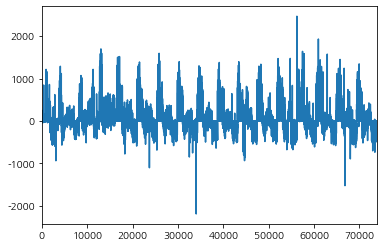

In [17]:
delta_logi['DELTA_LOGI'].plot()

In [18]:
delta_logi

,DL_GD_LCLS_CD,CTPV_CD,CTGG_CD,HDNG_CD,INVC_CONT_x,DL_YM,INVC_CONT_y,DELTA_LOGI
0,12,11,14,665,16,201,9,-7
1,10,11,14,615,4,201,4,0
2,10,27,11,565,1,201,3,2
3,12,27,11,650,6,201,11,5
4,13,27,26,690,21,201,30,9
...,...,...,...,...,...,...,...,...
73817,20,11,14,645,55,531,9,-46
73818,21,27,26,520,120,531,32,-88
73819,21,11,14,625,74,531,15,-59
73820,19,27,11,595,150,531,12,-138


In [19]:
delta_logi['DL_D'] =delta_logi['DL_YM']%100 

In [20]:
delta_logi

,DL_GD_LCLS_CD,CTPV_CD,CTGG_CD,HDNG_CD,INVC_CONT_x,DL_YM,INVC_CONT_y,DELTA_LOGI,DL_D
0,12,11,14,665,16,201,9,-7,1
1,10,11,14,615,4,201,4,0,1
2,10,27,11,565,1,201,3,2,1
3,12,27,11,650,6,201,11,5,1
4,13,27,26,690,21,201,30,9,1
...,...,...,...,...,...,...,...,...,...
73817,20,11,14,645,55,531,9,-46,31
73818,21,27,26,520,120,531,32,-88,31
73819,21,11,14,625,74,531,15,-59,31
73820,19,27,11,595,150,531,12,-138,31


In [21]:
def logi_things_plot(graph, code,ax):
    graph = graph[:]
    graph = graph.loc[graph['DL_GD_LCLS_CD'] == code].groupby("DL_D").sum().sort_values(by='DELTA_LOGI')
#     graph['DL_D'] = graph.index%100
#     graph = graph.set_index('DL_D')
#     graph = graph.sort_index()
    graph.loc[graph['DELTA_LOGI']<0]['DELTA_LOGI'].plot(kind='bar',ax=ax,title=metaLogi[code])


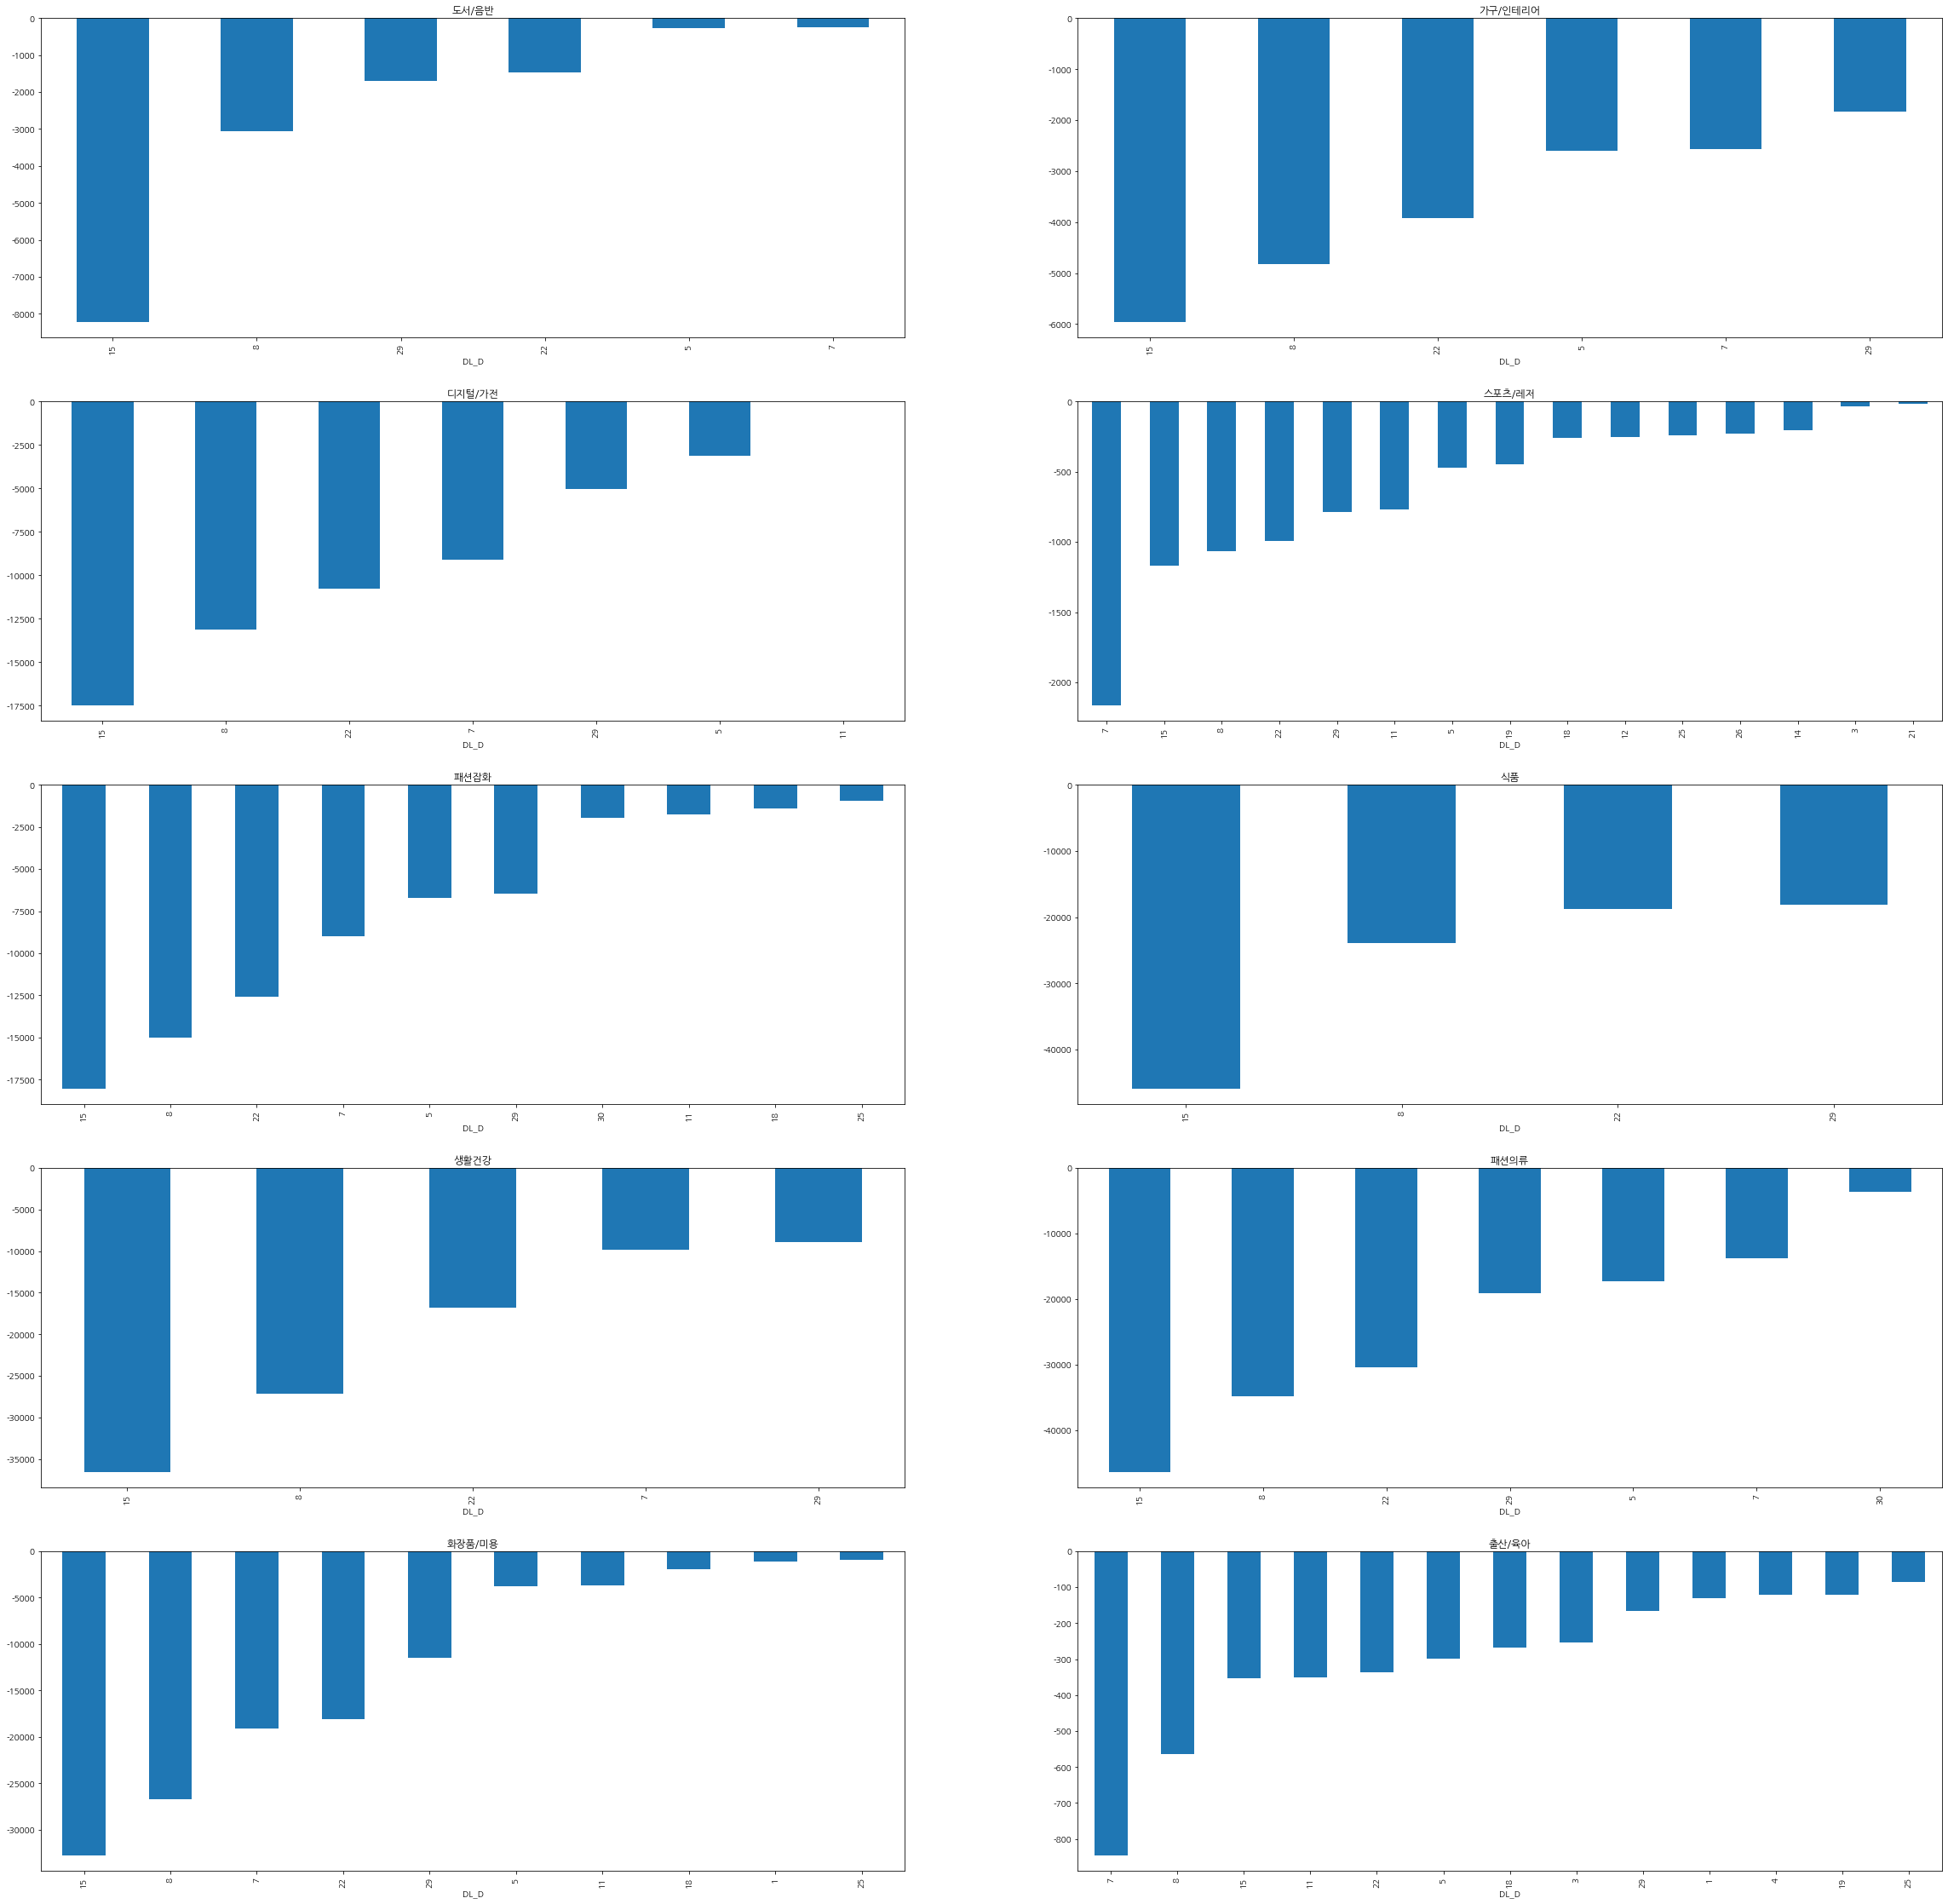

In [22]:
fig = plt.figure(figsize=(40,40))
cnt=1
for code in Logi['DL_GD_LCLS_CD'].unique():
    ax = fig.add_subplot(5,2,cnt)
    logi_things_plot(delta_logi,code,ax)
    cnt+=1

In [23]:
def logi_things_plot(graph, code,ax):
    graph = graph.loc[graph['DL_GD_LCLS_CD'] == code].groupby("DL_YM").sum().sort_values(by='DELTA_LOGI')
#     graph['DL_D'] = graph.index%100
#     graph = graph.set_index('DL_D')
    graph['DELTA_LOGI'].plot(kind='bar',ax=ax,title=metaLogi[code])


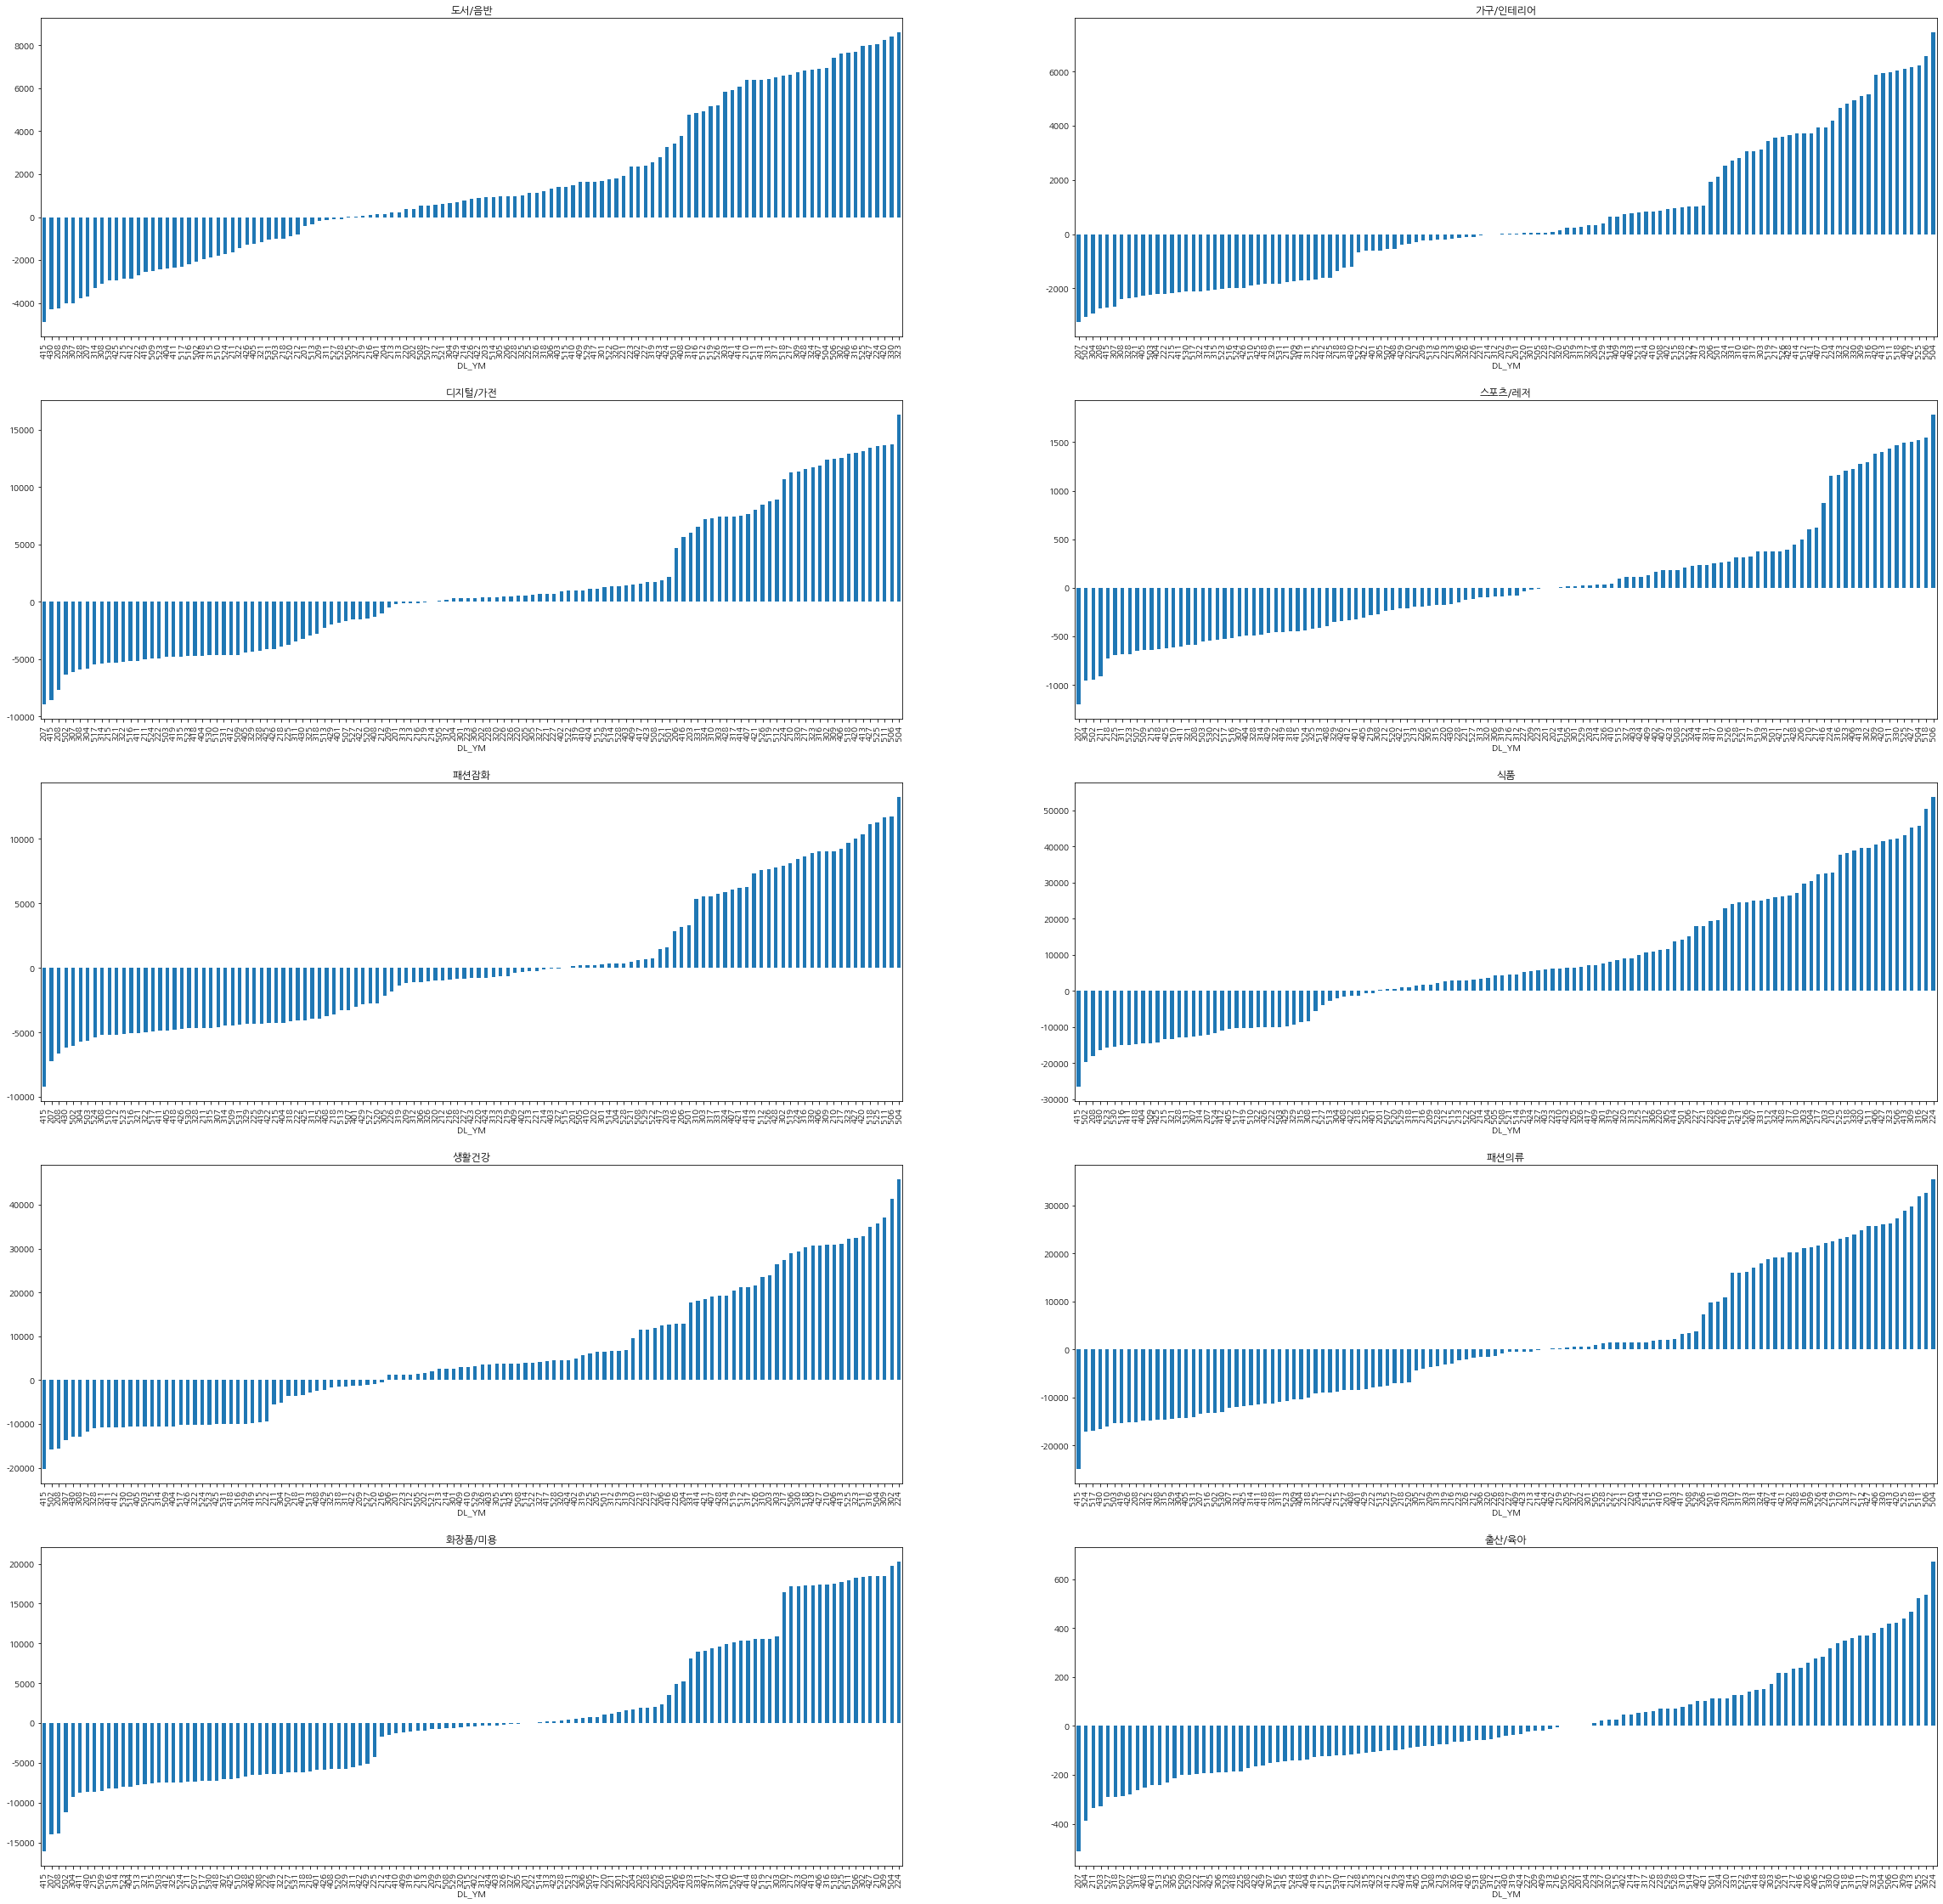

In [24]:
fig = plt.figure(figsize=(40,40))
cnt=1
for code in Logi['DL_GD_LCLS_CD'].unique():
    ax = fig.add_subplot(5,2,cnt)
    logi_things_plot(delta_logi,code,ax)
    cnt+=1

In [25]:
len(Logi['DL_GD_LCLS_CD'].unique())

10

# 카드데이터 핸들링
작년보다 매출이 가장 많이 떨어진 업종을 찾아야한다.  
(20년도 - 19년도) 카드사용량,카드매출양  
(20년도 - 19년도)/(20년도) 카드사용량,카드매출양 비율  

# 카드 차분데이터 생성

In [26]:
Card_resi = Data['Card'][5] 
Card_fori = Data['Card'][4]
Card_resi['STD_MM'] = Card_resi['STD_DD']%10000
Card_fori['STD_MM'] = Card_fori['STD_DD']%10000

resi19 = Card_resi.loc[Card_resi["STD_DD"]<20200000]
resi20 = Card_resi.loc[Card_resi["STD_DD"]>20200000]

resi19 = resi19.drop(columns="STD_DD").groupby([x for x in resi19.columns if x not in ["USE_CNT","USE_AMT","STD_DD"]]).sum().reset_index()
resi19

resi20 = resi20.drop(columns="STD_DD").groupby([x for x in resi20.columns if x not in ["USE_CNT","USE_AMT","STD_DD"]]).sum().reset_index()
resi20

delta_resi = pd.merge(resi20,resi19,on=[x for x in resi20.columns if x not in ["USE_CNT","USE_AMT","STD_DD"]])
delta_resi.rename({"USE_CNT_x":"USE_CNT_2020","USE_AMT_x":"USE_AMT_2020","USE_CNT_y":"USE_CNT_2019","USE_AMT_y":"USE_AMT_2019"},inplace=True,axis=1)

delta_resi['delta_cnt'] = delta_resi['USE_CNT_2020']-delta_resi['USE_CNT_2019']
delta_resi['delta_amt'] = delta_resi['USE_AMT_2020']-delta_resi['USE_AMT_2019']
delta_resi["SEX_CD"] = delta_resi["SEX_CD"].apply(lambda x: 1 if x=='M' else 0)
delta_resi

,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,STD_MM,USE_CNT_2020,USE_AMT_2020,USE_CNT_2019,USE_AMT_2019,delta_cnt,delta_amt
0,110,517,10,0,20,202,5,316,11,541,-6,-225
1,110,517,10,0,20,206,11,74,5,81,6,-7
2,110,517,10,0,20,310,5,210,5,162,0,48
3,110,517,10,0,20,316,5,79,11,162,-6,-83
4,110,517,10,0,20,426,5,267,6,110,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...
986091,350,720,81,1,65,526,5,68,9,192,-4,-124
986092,350,720,81,1,65,530,5,30,4,20,1,10
986093,350,720,81,1,65,531,5,29,9,133,-4,-104
986094,350,720,92,1,40,401,5,92,5,46,0,46


# 업종별 소비 클러스터링

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,n_init=3)

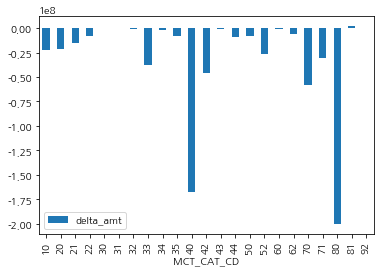

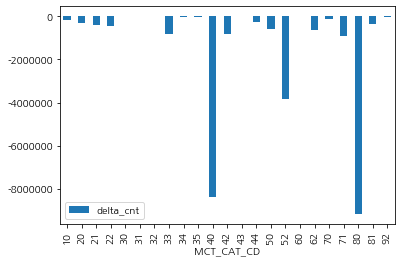

In [28]:
cdr20 = Card_resi[Card_resi["STD_DD"]>20200000].groupby(['STD_DD','GU_CD','DONG_CD','MCT_CAT_CD']).sum().reset_index()
cdr19 = Card_resi[Card_resi["STD_DD"]<20200000].groupby(['STD_DD','GU_CD','DONG_CD','MCT_CAT_CD']).sum().reset_index()

cdr20['M'] = cdr20['STD_DD']%10000
cdr19['M'] = cdr19['STD_DD']%10000

cdr_delta = pd.merge(cdr20.drop(columns=['STD_DD','STD_MM','AGE_CD']),cdr19.drop(columns=['STD_DD','STD_MM','AGE_CD']),on=['M','MCT_CAT_CD','GU_CD','DONG_CD'])

cdr_delta["delta_cnt"] = cdr_delta['USE_CNT_x']-cdr_delta['USE_CNT_y']
cdr_delta["delta_amt"] = cdr_delta['USE_AMT_x']-cdr_delta['USE_AMT_y']

cdr_delta.groupby("MCT_CAT_CD").sum()[["delta_amt"]].plot(kind='bar')

cdr_delta.groupby("MCT_CAT_CD").sum()[["delta_cnt"]].plot(kind='bar')

In [29]:
amt_threshold = cdr_delta.groupby("MCT_CAT_CD").sum()[["delta_amt","delta_cnt"]]

amt_threshold

,delta_amt,delta_cnt
MCT_CAT_CD,,
10,-22109832,-159673
20,-21126950,-320567
21,-15284799,-423201
22,-7843934,-454167
30,262685,716
31,-31675,213
32,-1120067,-1232
33,-37924295,-820875
34,-1578530,-27734


In [30]:
kmeans.fit(amt_threshold)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=3, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
k_means_mct = dict(zip(amt_threshold.index,kmeans.labels_)) 

In [32]:
delta_resi['MCT_CD_CLUSTERed'] = delta_resi['MCT_CAT_CD'].apply(lambda x : k_means_mct[x])

delta_resi.drop([x for x in delta_resi.columns if x[0] == 'U'],axis=1,inplace=True)

In [33]:
card_loc_des = Data['Card'][1].iloc[1:,1:]
card_loc_des.columns = ["GU_CD","DONG_CD","GU_NM","HDONG_NM"]

card_loc_des['GU_CD'] = card_loc_des['GU_CD'].astype(np.int64)
card_loc_des['DONG_CD'] = card_loc_des['DONG_CD'].astype(np.int64)

delta_resi = pd.merge(delta_resi,card_loc_des,on=['GU_CD','DONG_CD'])

In [34]:
delta_resi

,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,STD_MM,delta_cnt,delta_amt,MCT_CD_CLUSTERed,GU_NM,HDONG_NM
0,110,517,10,0,20,202,-6,-225,2,대구 중구,동인동
1,110,517,10,0,20,206,6,-7,2,대구 중구,동인동
2,110,517,10,0,20,310,0,48,2,대구 중구,동인동
3,110,517,10,0,20,316,-6,-83,2,대구 중구,동인동
4,110,517,10,0,20,426,-1,157,2,대구 중구,동인동
...,...,...,...,...,...,...,...,...,...,...,...
986091,350,720,81,1,65,526,-4,-124,0,서울 노원구,상계10동
986092,350,720,81,1,65,530,1,10,0,서울 노원구,상계10동
986093,350,720,81,1,65,531,-4,-104,0,서울 노원구,상계10동
986094,350,720,92,1,40,401,0,46,0,서울 노원구,상계10동


In [35]:
pe = pd.read_csv("../Data/연령별요동인구차분데이터.csv",encoding='cp949')
pe.drop("Unnamed: 0",axis=1,inplace=True)
pe["STD_MM"] = pe['STD_YMD']%10000
pe = pe.iloc[:,3:]

In [36]:
pe['SEX_CD'] = 1
pe['AGE_CD'] = 1

In [37]:
new_pe = pd.DataFrame()

for i in pe.columns[1:-4]:
    df = pe[['STD_MM','HDONG_NM','SEX_CD',"AGE_CD","label",i]]
    sex = i[0]
    age = int(i[1:-1])
    if age<20:
        continue
    else:
        if sex == '남':
            sex = 1
        else:
            sex = 0
        age-=4
        df['SEX_CD'] = sex
        df['AGE_CD'] = age
        df.columns = ['STD_MM','HDONG_NM','SEX_CD','AGE_CD',"LABEL","PEOPLE"]
        new_pe = pd.concat([new_pe,df])
    

c:\anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
c:\anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [38]:
new_pe['AGE_CD'] = new_pe['AGE_CD'].replace(66,65)

In [39]:
delta_resi = pd.merge(delta_resi,new_pe,on=['STD_MM','HDONG_NM','SEX_CD','AGE_CD'])

In [40]:
section = {10: '숙박',
 20: '레저용품',
 21: '레저업소',
 22: '문화취미',
 30: '가구',
 31: '전기',
 32: '주방용구',
 33: '연료판매',
 34: '광학제품',
 35: '가전',
 40: '유통업',
 42: '의복',
 43: '직물',
 44: '신변잡화',
 50: '서적문구',
 52: '사무통신',
 60: '자동차판매',
 62: '자동차정비',
 70: '의료기관',
 71: '보건위생',
 80: '요식업소',
 81: '음료식품',
 92: '수리서비스'}

# 유통데이터 핸들링

In [41]:
Data['Delivery'][-1]

['04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx_stcount_6']

In [42]:
Data['Delivery'][0]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,테이블 정의서,NaN,NaN,NaN,NaN,NaN
1,NaN,테이블명,NaN,"일자별 행정동별 매출지수, 카테고리 비중",NaN,테이블ID,TB_DD_STR_PURCH_CLS
2,NaN,테이블개요,NaN,[적재주기 : 일단위] \n기준년월일의 기준지역 내 점포들의 영업일자별 구매금액을 ...,NaN,NaN,NaN
3,NaN,특기사항,NaN,"1. 기간 : '19년 2월 1일~'19년 5월 31일, '20년 2월 1일~'20...",NaN,NaN,NaN
4,NaN,순서,컬럼ID,NaN,컬럼명,물리데이터타입,비고
5,NaN,1,OPER_DT,NaN,영업일자,VARCHAR(8),NaN
6,NaN,2,PVN,NaN,시코드,VARCHAR(5),NaN
7,NaN,3,BOR,NaN,구코드,VARCHAR(5),NaN
8,NaN,4,ADMD,NaN,행정동코드,VARCHAR(8),NaN
9,NaN,5,AMT_IND,NaN,매출지수,"NUMBER(5,2)",NaN


In [43]:
Data['Delivery'][1]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,시코드,시명,구코드,구명,행정동코드,행정동명
1,NaN,11,서울특별시,1114,중구,11140520,소공동
2,NaN,11,서울특별시,1114,중구,11140540,회현동
3,NaN,11,서울특별시,1114,중구,11140550,명동
4,NaN,11,서울특별시,1114,중구,11140570,필동
...,...,...,...,...,...,...,...
56,NaN,27,대구광역시,2726,수성구,27260661,범물1동
57,NaN,27,대구광역시,2726,수성구,27260662,범물2동
58,NaN,27,대구광역시,2726,수성구,27260670,고산1동
59,NaN,27,대구광역시,2726,수성구,27260680,고산2동


In [44]:
Data['Delivery'][2]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,분석용상품대분류코드,분석용상품대분류명,상품 예시
1,NaN,10,식사,"F/F, 김치, 통조림, 즉석식품"
2,NaN,20,간식,"견과, 스낵, 껌/캔디/젤리, 과일"
3,NaN,30,마실거리,"음료, 유제품"
4,NaN,40,홈&리빙,"라이터, 건전지, 일회용품, 방향제"
5,NaN,50,헬스&뷰티,"마스크, 샴푸, 린스, 칫솔"
6,NaN,60,취미&여가활동,"완구, 대형가전, 애완동물, 레져"
7,NaN,70,사회활동,"문구, 소형가전(이어폰 등)"
8,NaN,80,임신/육아,"유아, 인형"


In [45]:
Data['Delivery'][3]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PVN,BOR,ADMD,2.019020e+07,2.019020e+07,2.019020e+07,2.019020e+07,2.019020e+07,2.019021e+07,2.019021e+07,...,2.020052e+07,2.020052e+07,2.020052e+07,2.020052e+07,2.020053e+07,2.020053e+07,2.020053e+07,2.020053e+07,2.020053e+07,2.020053e+07
3,전체,NaN,NaN,1.198007e+00,1.017985e+00,9.636836e-01,9.187590e-01,1.028130e+00,9.000219e-01,1.062491e+00,...,1.080985e+00,1.020417e+00,8.858034e-01,1.021254e+00,1.067526e+00,1.063149e+00,1.076086e+00,1.137684e+00,1.045754e+00,9.287247e-01
4,서울특별시,NaN,NaN,1.188696e+00,1.004386e+00,9.537751e-01,8.995791e-01,1.036262e+00,8.927647e-01,1.079589e+00,...,1.162798e+00,1.078928e+00,9.301470e-01,1.098651e+00,1.143194e+00,1.147769e+00,1.169708e+00,1.226083e+00,1.110484e+00,9.781009e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,대구광역시,수성구,범물1동,7.554043e-01,9.182633e-01,8.201643e-01,1.043473e+00,1.065493e+00,8.364034e-01,8.346464e-01,...,8.606028e-01,9.154997e-01,8.292520e-01,8.418950e-01,9.494111e-01,8.974344e-01,8.507764e-01,9.648802e-01,9.633305e-01,7.999963e-01
66,대구광역시,수성구,범물2동,1.049858e+00,8.587615e-01,8.857105e-01,9.766516e-01,1.270511e+00,8.135788e-01,8.163705e-01,...,8.770364e-01,7.662027e-01,6.668240e-01,7.512638e-01,7.546354e-01,7.568331e-01,7.066945e-01,7.230945e-01,8.189332e-01,7.958159e-01
67,대구광역시,수성구,고산1동,1.064336e+00,9.400263e-01,9.436377e-01,9.545527e-01,9.897848e-01,8.474912e-01,8.759402e-01,...,7.901645e-01,7.786123e-01,6.651004e-01,7.030475e-01,7.805854e-01,7.452863e-01,7.331229e-01,8.213566e-01,8.628027e-01,7.323572e-01
68,대구광역시,수성구,고산2동,1.076418e+00,1.172479e+00,1.153766e+00,1.556855e+00,1.658221e+00,1.122046e+00,1.105032e+00,...,1.078168e+00,1.093085e+00,1.139640e+00,1.183757e+00,1.077460e+00,1.189024e+00,1.180665e+00,1.133741e+00,1.152602e+00,1.094919e+00


In [46]:
val = list(Data['Delivery'][2]['Unnamed: 2'].values)[1:]

In [47]:
Deli = Data['Delivery'][5]

In [48]:
Deli['STD_DM'] = Deli['OPER_DT']//100

In [49]:
Deli_month = Deli.groupby('STD_DM').mean()

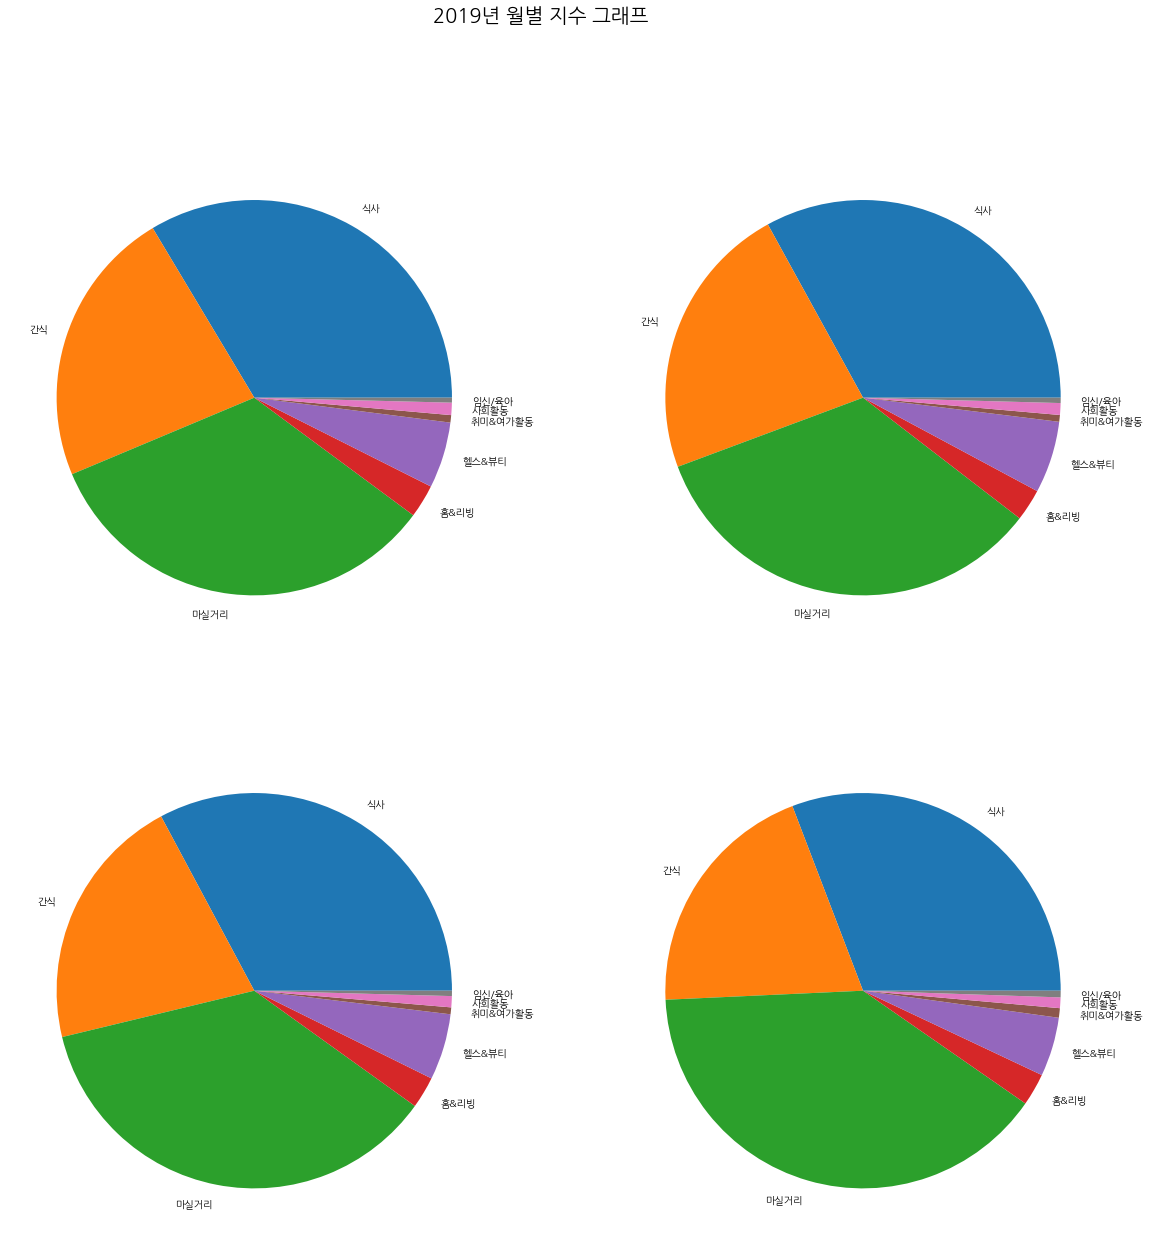

In [50]:
fig = plt.figure(figsize=(20,20))
fig.suptitle("2019년 월별 지수 그래프",fontsize=20)
cnt = 1
for i in range(4):
    fig.add_subplot(2,2,cnt)
    plt.pie(Deli_month.iloc[:4,2:].iloc[i],labels=val)
    cnt+=1

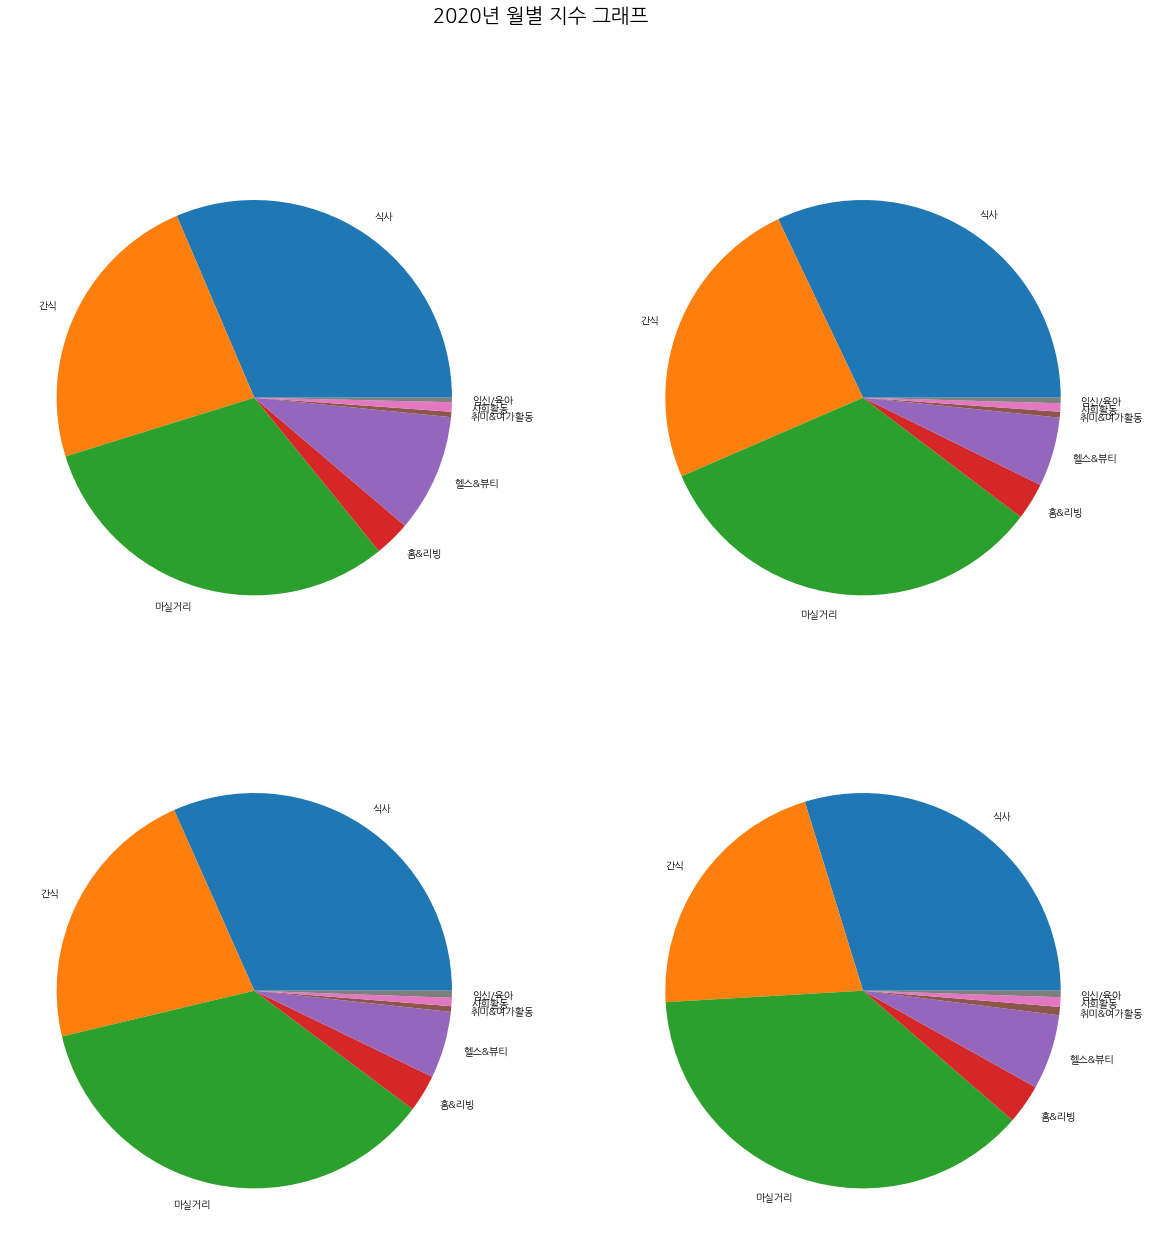

In [51]:
fig = plt.figure(figsize=(20,20))
fig.suptitle("2020년 월별 지수 그래프",fontsize=20)
cnt = 1
for i in range(4):
    fig.add_subplot(2,2,cnt)
    plt.pie(Deli_month.iloc[4:,2:].iloc[i],labels=val)
    cnt+=1

([<matplotlib.axis.XTick at 0x1fc8bfd8be0>,
 <a list of 4 Text xticklabel objects>)

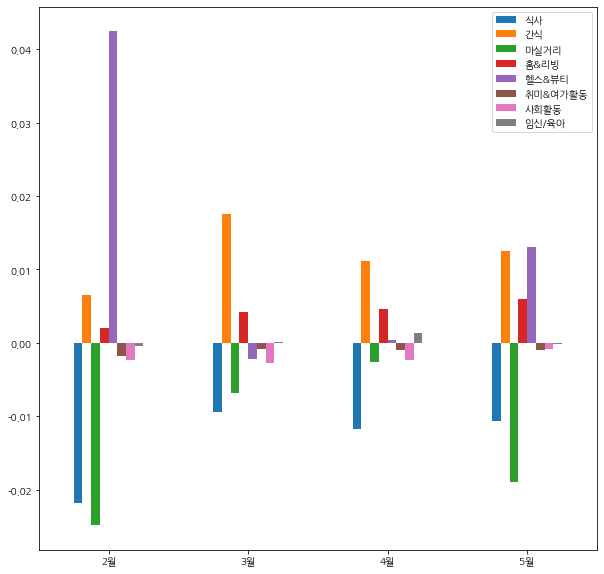

In [52]:
(Deli_month.iloc[4:,2:].reset_index() - Deli_month.iloc[:4,2:].reset_index()).drop('STD_DM',axis=1).plot(kind = 'bar',rot=0,figsize=(10,10))
plt.legend(val,bbox_to_anchor=(1,1))
plt.xticks([0,1,2,3],['2월','3월','4월','5월'])

In [53]:
Data['Delivery'][2]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,분석용상품대분류코드,분석용상품대분류명,상품 예시
1,NaN,10,식사,"F/F, 김치, 통조림, 즉석식품"
2,NaN,20,간식,"견과, 스낵, 껌/캔디/젤리, 과일"
3,NaN,30,마실거리,"음료, 유제품"
4,NaN,40,홈&리빙,"라이터, 건전지, 일회용품, 방향제"
5,NaN,50,헬스&뷰티,"마스크, 샴푸, 린스, 칫솔"
6,NaN,60,취미&여가활동,"완구, 대형가전, 애완동물, 레져"
7,NaN,70,사회활동,"문구, 소형가전(이어폰 등)"
8,NaN,80,임신/육아,"유아, 인형"


In [54]:
Deli_month["ETC"] = Deli_month[['LCLS_40_P','LCLS_60_P','LCLS_70_P','LCLS_80_P']].sum(axis=1)

In [55]:
Deli_month['EAT'] = Deli_month[['LCLS_10_P','LCLS_20_P','LCLS_30_P']].sum(axis=1)

In [56]:
Deli_month['MASK'] = Deli_month['LCLS_50_P']

([<matplotlib.axis.XTick at 0x1fc8c90bac8>,
 <a list of 6 Text xticklabel objects>)

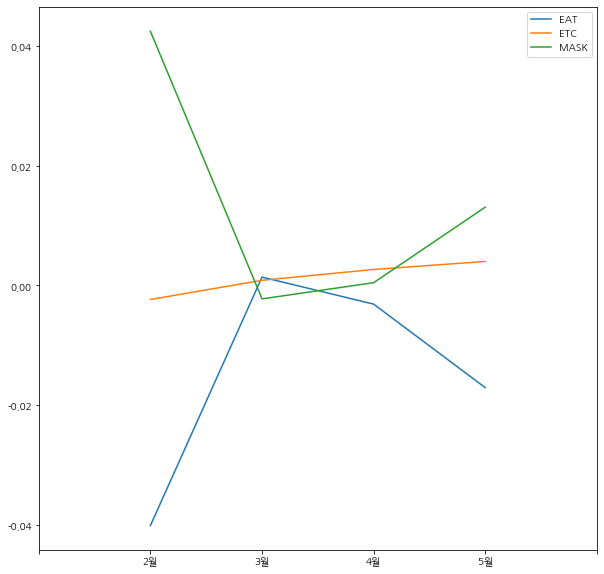

In [57]:
(Deli_month[['EAT',"ETC","MASK"]][4:].reset_index() - Deli_month[['EAT',"ETC","MASK"]][:4].reset_index()).drop('STD_DM',axis=1).plot(rot=0,figsize=(10,10))
plt.legend(['EAT',"ETC","MASK"],bbox_to_anchor=(1,1))
plt.xticks([-1,0,1,2,3,4],["",'2월','3월','4월','5월',""])

# 코로나 데이터 핸들링

In [58]:
Data['Corona'][0]

,date,confirmed,death,released,tested,negative
0,20200121,1,0,0,1,0
1,20200122,1,0,0,1,0
2,20200123,1,0,0,1,0
3,20200124,2,0,0,2,0
4,20200125,2,0,0,2,0
...,...,...,...,...,...,...
217,20200825,17945,310,14286,1825837,1757530
218,20200826,18265,312,14368,1849506,1778446
219,20200827,18706,313,14461,1869579,1798832
220,20200828,19077,316,14551,1887717,1817929


In [59]:
Corona = Data['Corona'][0]

In [60]:
Corona_1 = Corona[:]

In [61]:
Corona_1

,date,confirmed,death,released,tested,negative
0,20200121,1,0,0,1,0
1,20200122,1,0,0,1,0
2,20200123,1,0,0,1,0
3,20200124,2,0,0,2,0
4,20200125,2,0,0,2,0
...,...,...,...,...,...,...
217,20200825,17945,310,14286,1825837,1757530
218,20200826,18265,312,14368,1849506,1778446
219,20200827,18706,313,14461,1869579,1798832
220,20200828,19077,316,14551,1887717,1817929


In [62]:
Corona_1.index+=1

In [63]:
Corona['day_confirmed'] =Corona['confirmed']-Corona_1['confirmed'] 

In [64]:
Corona['STD_MM'] = Corona['date']%10000

In [65]:
Corona = Corona.loc[Corona['STD_MM']>200][['STD_MM','day_confirmed']]

# 데이터 피쳐 정의부

In [66]:
feature_table = pd.DataFrame()

In [67]:
delta_resi = pd.merge(delta_resi,Corona,on='STD_MM')

In [68]:
feature_table = (delta_resi.drop(columns=['MCT_CAT_CD','GU_NM','HDONG_NM','MCT_CD_CLUSTERed']))

In [69]:
feature_table['double_amt'] = feature_table['delta_amt'].apply(lambda x:x**2)
feature_table['double_cnt'] = feature_table['delta_cnt'].apply(lambda x:x**2)

In [70]:
feature_table.drop(columns = ['LABEL'],inplace=True)

In [71]:
 X,y = feature_table,delta_resi.drop(columns='MCT_CAT_CD')['MCT_CD_CLUSTERed']

피해군을 1차 분류를 해준뒤 학습시켜 차분값에 따른 차등을 예측하고 그 예측값을 통해 나온 값을 다시 사용하여 인사이트를 얻는다

In [86]:
X

,GU_CD,DONG_CD,SEX_CD,AGE_CD,STD_MM,delta_cnt,delta_amt,PEOPLE,day_confirmed,double_amt,double_cnt
0,110,517,0,20,202,-6,-225,-1148.09,3.0,50625,36
1,110,517,0,20,202,14,43,-1148.09,3.0,1849,196
2,110,517,0,20,202,-99,-1153,-1148.09,3.0,1329409,9801
3,110,517,0,20,202,0,-165,-1148.09,3.0,27225,0
4,110,517,1,25,202,-5,-545,-2294.36,3.0,297025,25
...,...,...,...,...,...,...,...,...,...,...,...
1069763,350,720,1,60,421,0,-75,294.88,9.0,5625,0
1069764,350,720,1,65,421,-9,-382,300.96,9.0,145924,81
1069765,350,720,1,65,421,-9,-382,156.36,9.0,145924,81
1069766,350,720,1,65,421,-5,25,300.96,9.0,625,25


In [87]:
pd.DataFrame(y)

,MCT_CD_CLUSTERed
0,2
1,1
2,1
3,0
4,2
...,...
1069763,1
1069764,1
1069765,1
1069766,1


# 모델 테스트

# Tree Based Model & Tunning

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=200)

In [73]:
configure = {"n_estimators":[64,80,90,100,120,150,180,200],"max_depth":[20,22,24,25,27,30],"max_feature":[x for x in range(1,len(feature_table)+1)]}
train,test = [],[]

In [74]:
from sklearn.ensemble import RandomForestClassifier

64 is done....
80 is done....
90 is done....
100 is done....
120 is done....
150 is done....
180 is done....
200 is done....
Ploting Train rate....
Ploting Test rate....


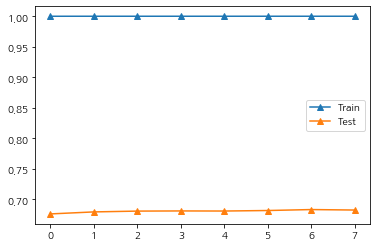

In [75]:
for var in configure['n_estimators']:
    RF = RandomForestClassifier(n_estimators=var)
    RF.fit(X_train,y_train)
    train.append(RF.score(X_train,y_train))
    test.append(RF.score(X_test,y_test))
    print(var,'is done....')

plt.plot(range(len(train)),train,label="Train",marker='^')
print("Ploting Train rate....")
plt.plot(range(len(test)),test,label="Test",marker='^')
print("Ploting Test rate....")
plt.legend()
plt.show()
train,test = [],[]


20 is done....
22 is done....
24 is done....
25 is done....
27 is done....
30 is done....
Ploting Train rate....
Ploting Test rate....


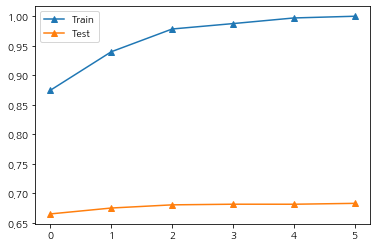

In [76]:
for var in configure['max_depth']:
    RF = RandomForestClassifier(max_depth=var)
    RF.fit(X_train,y_train)
    train.append(RF.score(X_train,y_train))
    test.append(RF.score(X_test,y_test))
    print(var,'is done....')
plt.plot(range(len(train)),train,label="Train",marker='^')
print("Ploting Train rate....")
plt.plot(range(len(test)),test,label="Test",marker='^')
print("Ploting Test rate....")
plt.legend()
plt.show()
train,test = [],[]

In [78]:
RF = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1,max_depth=24,oob_score=True).fit(X_train,y_train)
print("RandomForest")
print("훈련 세트 정확도: {:.3f}".format(RF.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(RF.score(X_test,y_test)))

RandomForest
훈련 세트 정확도: 0.977
테스트 세트 정확도: 0.679


In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
ADA = AdaBoostClassifier(n_estimators=20, random_state = 42,learning_rate=0.5).fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(ADA.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(ADA.score(X_test,y_test)))

훈련 세트 정확도: 0.523
테스트 세트 정확도: 0.522


In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
gbrt = GradientBoostingClassifier(n_estimators=20, random_state = 42,learning_rate=0.2).fit(X_train,y_train)
print("GradientBoosting")
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

GradientBoosting
훈련 세트 정확도: 0.556
테스트 세트 정확도: 0.554


In [84]:
from sklearn.ensemble import ExtraTreesClassifier

In [85]:
xtree = ExtraTreesClassifier(n_estimators = 200,max_depth=30, n_jobs=-1, random_state=0)
xtree.fit(X_train,y_train)
print("ExtraTreesClassifier")
print("훈련 세트 정확도: {:.3f}".format(xtree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(xtree.score(X_test,y_test)))

ExtraTreesClassifier
훈련 세트 정확도: 0.939
테스트 세트 정확도: 0.657
